In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2022-02-24 21:36:56 +01:00)


In [2]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#%matplotlib notebook
import matplotlib.cm as cm
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
import plotly.express as px
# Data Preparation and Scoring
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
# ML Algorithms to be used
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as LGBMClassifier
# ML Algorithms to be used
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers
from keras.layers import BatchNormalization
tf.__version__
#pip install lightgbm
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

time: 10.6 s (started: 2022-02-24 21:36:56 +01:00)


In [3]:
#pip install plotly

time: 0 ns (started: 2022-02-24 21:37:07 +01:00)


# 1. Analysis of the Problem

## Understand the Problem 
I wanted a Dataset related to Mechanical Engineering field such as Automotive/Robotics Where I can learn some Practical Applications of the Machine Learning in these areas. I am interested in learning how a prediction Task can take place using machine Leraning algorithms. My goal here is to find most suitable machine learning algorithm for a wall following task which would enable the robot to navigate through the room without collisions.  

Here I am dealing with Multi-Class Classification problem with label data which means it is a superwised learning Task. As per Data I have four classes in which data needs to be classified. 
            -- Move-Forward
      		-- Slight-Right-Turn
      		-- Sharp-Right-Turn
      		-- Slight-Left-Turn

The data is collected from a SCITOS G5 as it navigates through the room following the Wall in a Clockwise Direction for 4 rounds. To navigate Robot uses 24 Sensors arranged circularly around its Waist. 
The provided files comprise three diferent data sets. The first one contains the raw values of the measurements of all 24 ultrasound sensors and the corresponding class label.The second one contains four sensor readings named 'simplified distances' and the corresponding class label. These simplified distances are referred to as the 'front distance', 'left distance', 'right distance' and 'back distance'. The third one contains only the front and left simplified distances and the corresponding class label.

We know that its a Wall following Robot moving in a clockwise Direction thus only data that we need is a front and left distance. Although by using this data it reduces number of variables drastically, it becomes a very trivial problem and leaves no room for optimization. So for the sake of the project I will be using Raw sensor Data which gives me more room to explore and experiment, optimize. 

## Choosing a measure of Loss/Success: 
Here we have a classification problem. Therefore we will use log loss, Accuracy, Precision as success Parameters. In neural network we will have categorical crossentropy as our loss function. 


# 2. Data Exploration and Preparation

## Importing Data 

In [4]:
# Loading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_24.data'
new_names = ['US1','US2','US3','US4','US5','US6', 'US7', 'US8','US9','US10','US11','US12','US13','US14','US15','US16','US17','US18','US19','US20','US21','US22','US23','US24', 'Class']
data = pd.read_csv(url, names=new_names, delimiter=',')
data

US1    US2    US3    US4    US5    US6    US7    US8    US9   US10  \
0     0.438  0.498  3.625  3.645  5.000  2.918  5.000  2.351  2.332  2.643   
1     0.438  0.498  3.625  3.648  5.000  2.918  5.000  2.637  2.332  2.649   
2     0.438  0.498  3.625  3.629  5.000  2.918  5.000  2.637  2.334  2.643   
3     0.437  0.501  3.625  3.626  5.000  2.918  5.000  2.353  2.334  2.642   
4     0.438  0.498  3.626  3.629  5.000  2.918  5.000  2.640  2.334  2.639   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5451  0.910  5.000  3.997  2.785  2.770  2.572  2.433  1.087  1.772  1.040   
5452  0.926  5.000  4.015  2.792  2.777  2.571  1.768  1.071  1.762  1.021   
5453  0.937  5.000  4.034  2.799  2.784  2.571  1.754  1.053  1.752  1.002   
5454  0.945  4.052  4.052  2.809  2.791  2.441  1.757  1.034  1.743  0.983   
5455  0.950  4.066  5.000  2.819  2.798  2.570  2.422  1.016  1.739  0.964   

      ...   US16   US17   US18   US19   US20   US21   US22   US23   US24  \
0     ...  0.593  0.502  0.493  0.504  0.445  0.431  0.444  0.440  0.429   
1     ...  0.592  0.502  0.493  0.504  0.449  0.431  0.444  0.443  0.429   
2     ...  0.593  0.502  0.493  0.504  0.449  0.431  0.444  0.446  0.429   
3     ...  0.593  0.502  0.493  0.504  0.449  0.431  0.444  0.444  0.429   
4     ...  0.592  0.502  0.493  0.504  0.449  0.431  0.444  0.441  0.429   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
5451  ...  0.660  0.648  0.657  0.686  5.000  1.045  5.000  5.000  1.562   
5452  ...  0.652  0.640  0.649  1.593  1.616  1.058  5.000  5.000  1.085   
5453  ...  0.648  0.633  0.642  0.741  5.000  1.065  5.000  5.000  1.105   
5454  ...  0.641  0.626  0.635  0.754  5.000  1.076  5.000  5.000  1.118   
5455  ...  0.635  0.618  0.628  0.776  5.000  1.083  5.000  5.000  1.168   

                  Class  
0     Slight-Right-Turn  
1     Slight-Right-Turn  
2     Slight-Right-Turn  
3     Slight-Right-Turn  
4     Slight-Right-Turn  
...                 ...  
5451       Move-Forward  
5452   Sharp-Right-Turn  
5453   Sharp-Right-Turn  
5454       Move-Forward  
5455   Sharp-Right-Turn  

[5456 rows x 25 columns]

time: 3.66 s (started: 2022-02-24 21:37:07 +01:00)


Here Sensor 1 - front of the Robot 
     Sensor 9 - Right of the robot 
     Sensor 19 - Left of the Robot
     Sensor 13 - Back of the robot 
Looking at the Data I observed that front distance in simplified dataset is calculated using Sensor 13 and surrounding sensors. Which means that Robot is moving backwards.   

In [5]:
front_dist = data.iloc[:,[10,11,12,13,14]].min(axis=1)
front_dist

Left_dist = data.iloc[:,[15,16,17,18,19]].min(axis=1)
simplified_data = pd.concat([front_dist, Left_dist, data['Class']], axis=1)
simplified_data.head()


0      1              Class
0  1.687  0.445  Slight-Right-Turn
1  1.687  0.449  Slight-Right-Turn
2  1.687  0.449  Slight-Right-Turn
3  1.687  0.449  Slight-Right-Turn
4  1.687  0.449  Slight-Right-Turn

time: 32 ms (started: 2022-02-24 21:37:10 +01:00)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   US1     5456 non-null   float64
 1   US2     5456 non-null   float64
 2   US3     5456 non-null   float64
 3   US4     5456 non-null   float64
 4   US5     5456 non-null   float64
 5   US6     5456 non-null   float64
 6   US7     5456 non-null   float64
 7   US8     5456 non-null   float64
 8   US9     5456 non-null   float64
 9   US10    5456 non-null   float64
 10  US11    5456 non-null   float64
 11  US12    5456 non-null   float64
 12  US13    5456 non-null   float64
 13  US14    5456 non-null   float64
 14  US15    5456 non-null   float64
 15  US16    5456 non-null   float64
 16  US17    5456 non-null   float64
 17  US18    5456 non-null   float64
 18  US19    5456 non-null   float64
 19  US20    5456 non-null   float64
 20  US21    5456 non-null   float64
 21  US22    5456 non-null   float64
 22  

In [7]:
#Loading the data
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_4.data'
#new_names = ['Front Distance', 'Left Distance', 'Right Distance', 'Back Distance','Class']
#data = pd.read_csv(url, names=new_names, delimiter=',')
#data.head()

time: 0 ns (started: 2022-02-24 21:37:11 +01:00)


In [8]:
#data.info()

time: 0 ns (started: 2022-02-24 21:37:11 +01:00)


In [9]:
# Loading the data
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_2.data'
#new_names = ['Front_Distance', 'Left_Distance','Class']
#data = pd.read_csv(url, names=new_names, delimiter=',')
#data.head()

time: 0 ns (started: 2022-02-24 21:37:11 +01:00)


In [10]:
#data.info()

time: 15 ms (started: 2022-02-24 21:37:11 +01:00)


## Understanding the Data 

In [11]:
activity_counts = data["Class"].value_counts()
activity_counts

Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: Class, dtype: int64

time: 15 ms (started: 2022-02-24 21:37:11 +01:00)


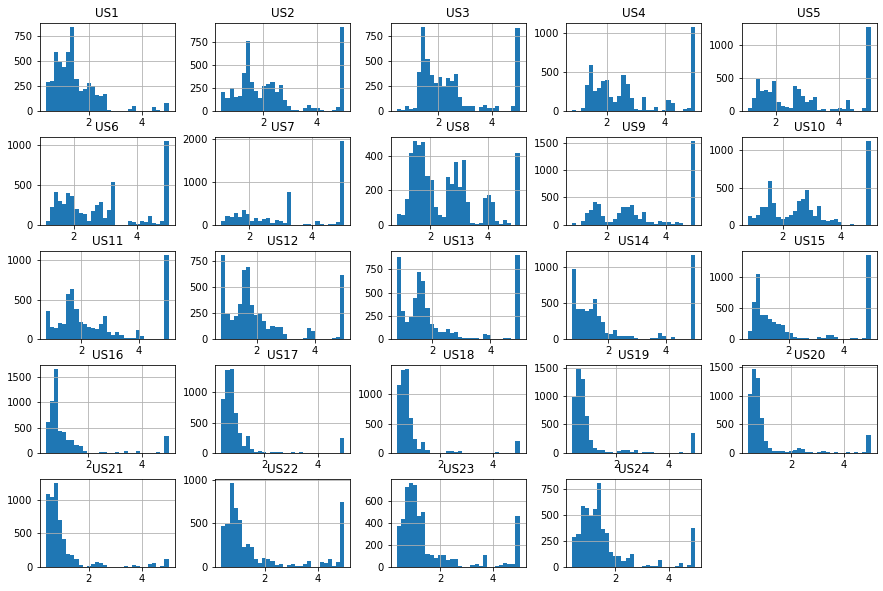

time: 5.02 s (started: 2022-02-24 21:37:11 +01:00)


In [12]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [13]:
nanCounter = pd.isnull(data).sum()
print(nanCounter)

US1      0
US2      0
US3      0
US4      0
US5      0
US6      0
US7      0
US8      0
US9      0
US10     0
US11     0
US12     0
US13     0
US14     0
US15     0
US16     0
US17     0
US18     0
US19     0
US20     0
US21     0
US22     0
US23     0
US24     0
Class    0
dtype: int64
time: 15 ms (started: 2022-02-24 21:37:16 +01:00)


In [14]:
data.describe()

US1          US2          US3          US4          US5  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000   
mean      1.471617     2.327043     2.489347     2.796501     2.958552   
std       0.802801     1.410146     1.247435     1.309368     1.339225   
min       0.400000     0.437000     0.470000     0.833000     1.120000   
25%       0.921000     1.362000     1.538750     1.731000     1.774000   
50%       1.335000     1.904500     2.064000     2.458000     2.667000   
75%       1.814000     2.681500     2.739250     4.093500     4.314500   
max       5.000000     5.025000     5.029000     5.017000     5.000000   

               US6          US7          US8          US9         US10  ...  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000  ...   
mean      2.893073     3.351113     2.540397     3.125621     2.832386  ...   
std       1.282575     1.413692     1.111554     1.356965     1.307843  ...   
min       1.114000     1.122000     0.859000     0.836000     0.810000  ...   
25%       1.785750     1.930750     1.618000     1.799750     1.636000  ...   
50%       2.682500     3.225500     2.172000     2.802000     2.679000  ...   
75%       3.835250     5.000000     3.193000     5.000000     3.526250  ...   
max       5.005000     5.008000     5.087000     5.000000     5.022000  ...   

              US15         US16         US17         US18        US19  \
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.00000   
mean      2.205772     1.202111     0.989831     0.910273     1.05811   
std       1.715435     1.098568     0.942075     0.889527     1.14463   
min       0.495000     0.424000     0.373000     0.354000     0.34000   
25%       0.860000     0.690000     0.581000     0.529750     0.52300   
50%       1.328500     0.803000     0.738000     0.685000     0.69100   
75%       4.436250     1.159000     0.913000     0.837000     0.85700   
max       5.000000     5.000000     5.000000     5.000000     5.00000   

              US20         US21         US22         US23         US24  
count  5456.000000  5456.000000  5456.000000  5456.000000  5456.000000  
mean      1.076320     1.015923     1.778034     1.555045     1.578508  
std       1.141498     0.887439     1.571686     1.291447     1.150480  
min       0.355000     0.380000     0.370000     0.367000     0.377000  
25%       0.541750     0.567000     0.743000     0.792000     0.884000  
50%       0.693000     0.764000     1.030500     1.071000     1.289000  
75%       0.863000     1.002250     2.068250     1.559500     1.657250  
max       5.000000     5.000000     5.000000     5.000000     5.000000  

[8 rows x 24 columns]

time: 141 ms (started: 2022-02-24 21:37:16 +01:00)


## Converting the Object data into Numbers 

Converting object data into Numbers

In [15]:
def Class_activity(x): 
    if x == 'Move-Forward':
        return 0
    elif x == 'Sharp-Right-Turn':
        return 1
    elif x == 'Slight-Right-Turn':
        return 2
    else:
        return 3


time: 0 ns (started: 2022-02-24 21:37:16 +01:00)


In [16]:
#Act_labels = ["Move-Forward", "Sharp-Right-Turn","Slight-Right-Turn","Slight-Left-Turn"]
#data['Class'] = {0:"Move-Forward", 1:"Sharp-Right-Turn",2:"Slight-Right-Turn", 3:"Slight-Left-Turn"}
data['Class'] = data['Class'].apply(Class_activity)
data["Class"].value_counts()

0    2205
1    2097
2     826
3     328
Name: Class, dtype: int64

time: 16 ms (started: 2022-02-24 21:37:16 +01:00)


In [17]:
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

time: 47 ms (started: 2022-02-24 21:37:16 +01:00)


In [18]:
#Rescaling the data
featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
#Looking into the statistics again:
dataX.describe()

US1           US2           US3           US4           US5  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   1.525336e-16 -2.296143e-16  3.708340e-16  6.742447e-16 -1.648878e-16   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -1.334970e+00 -1.340440e+00 -1.618948e+00 -1.499717e+00 -1.372974e+00   
25%   -6.859332e-01 -6.844195e-01 -7.621114e-01 -8.138268e-01 -8.845867e-01   
50%   -1.701916e-01 -2.996723e-01 -3.410086e-01 -2.585463e-01 -2.177220e-01   
75%    4.265239e-01  2.513850e-01  2.003519e-01  9.906439e-01  1.012580e+00   
max    4.395492e+00  1.913422e+00  2.036087e+00  1.696011e+00  1.524490e+00   

                US6           US7           US8           US9          US10  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   6.643330e-16  1.792290e-15 -1.059351e-16 -1.623783e-15 -1.298204e-15   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -1.387237e+00 -1.576947e+00 -1.512792e+00 -1.687465e+00 -1.546494e+00   
25%   -8.634383e-01 -1.004811e+00 -8.299019e-01 -9.771752e-01 -9.148618e-01   
50%   -1.641949e-01 -8.886278e-02 -3.314551e-01 -2.385108e-01 -1.172924e-01   
75%    7.346653e-01  1.166476e+00  5.871626e-01  1.381429e+00  5.305894e-01   
max    1.646781e+00  1.172136e+00  2.291239e+00  1.381429e+00  1.674371e+00   

       ...          US15          US16          US17          US18  \
count  ...  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   ...  6.902063e-16  8.947307e-17  1.376384e-16  1.207897e-16   
std    ...  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min    ... -9.973735e-01 -7.083607e-01 -6.548184e-01 -6.254159e-01   
25%    ... -7.845799e-01 -4.662052e-01 -4.340089e-01 -4.278208e-01   
50%    ... -5.114462e-01 -3.633346e-01 -2.673402e-01 -2.532738e-01   
75%    ...  1.300360e+00 -3.924673e-02 -8.156297e-02 -8.238068e-02   
max    ...  1.629024e+00  3.457443e+00  4.257131e+00  4.598066e+00   

               US19          US20          US21          US22          US23  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean  -1.187294e-16  2.990439e-16  2.460153e-17  1.452081e-16 -7.699934e-17   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -6.274305e-01 -6.319648e-01 -7.166474e-01 -8.959573e-01 -9.200175e-01   
25%   -4.675389e-01 -4.683490e-01 -5.059095e-01 -6.586107e-01 -5.908992e-01   
50%   -3.207532e-01 -3.358355e-01 -2.839021e-01 -4.756693e-01 -3.748427e-01   
75%   -1.757149e-01 -1.868947e-01 -1.540848e-02  1.846696e-01  3.449724e-03   
max    3.444126e+00  3.437623e+00  4.489819e+00  2.050195e+00  2.667759e+00   

               US24  
count  5.456000e+03  
mean  -1.049279e-16  
std    1.000092e+00  
min   -1.044450e+00  
25%   -6.037235e-01  
50%   -2.516642e-01  
75%    6.844896e-02  
max    2.974242e+00  

[8 rows x 24 columns]

time: 125 ms (started: 2022-02-24 21:37:16 +01:00)


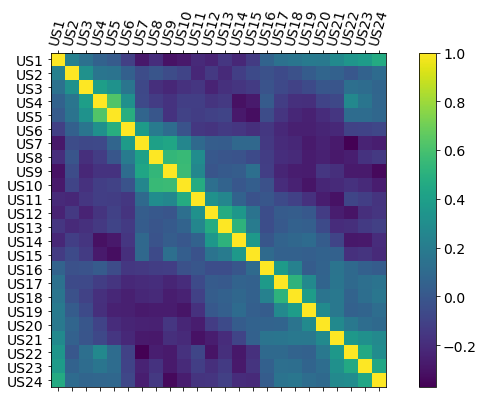

time: 813 ms (started: 2022-02-24 21:37:16 +01:00)


In [19]:
correlationMatrix = pd.DataFrame(dataX).corr() 

f = plt.figure(figsize=(12, 6))
plt.matshow(correlationMatrix, fignum=f.number)
plt.xticks(range(dataX.shape[1]), dataX.columns, fontsize=14, rotation=75)
plt.yticks(range(dataX.shape[1]), dataX.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [20]:
#we can also simply look at the table via pandas:
correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)

C:\Users\srbhg\AppData\Local\Temp/ipykernel_15888/2176417680.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)


time: 188 ms (started: 2022-02-24 21:37:17 +01:00)


Splitting the data in training and test data. Here I am keeping aside 25% of the data as Testing data. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.25, random_state=2020)

time: 0 ns (started: 2022-02-24 21:37:17 +01:00)


# 3. Testing Phase I: Baseline Models

## PCA

In [22]:
def scatterPlot(x_DF, y_DF, methodName):
  #Filtering the first two columns (first two dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:1], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension", "Label"]
  sns.lmplot(x="First Dimension", y="Second Dimension", hue="Label", data=df, fit_reg=False)
  ax = plt.gca()
  ax.set_title("Visualization of the data segragation using "+methodName)

time: 62 ms (started: 2022-02-24 21:37:17 +01:00)


In [23]:
def scatterPlot3D(x_DF, y_DF, methodName):
  #Filtering the first two columns (first three dimensions):
  df = pd.DataFrame(data=x_DF.loc[:,0:2], index=x_DF.index)
  #Adding the labels:
  df = pd.concat((df,y_DF), axis=1, join="inner")
  #Labeling the columns
  df.columns = ["First Dimension", "Second Dimension","Third Dimension", "Label"]

  # Plotting the figure:
  fig = px.scatter_3d(df, x='First Dimension', y='Second Dimension', z='Third Dimension',\
                      color='Label', symbol='Label', opacity=0.7, \
                      color_continuous_scale=px.colors.sequential.Viridis,
                      width = 600,
                      height = 500) 

  #https://plotly.com/python/reference/layout/#layout-transition
  title = "Visualization of the data segragation using "+methodName
  fig.update_layout(title_text=title, showlegend = True, hovermode = False)
  fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
  fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

  fig.show() 

time: 31 ms (started: 2022-02-24 21:37:17 +01:00)


In [24]:
#Hyperparameters 
n_components = 0.95 #95% of the contributing Components are kept
whiten = False 
svd_solver = 'auto'
random_state = 2020

# PCA Model Implementation:
pca = PCA(n_components=n_components, whiten=whiten, svd_solver = svd_solver, random_state=random_state)
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_test_PCA = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index) 

#Transform data back to its original space:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
# Organizing the data:
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

#Transform data back to its original space:
X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
# Organizing the data:
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, index=X_test.index)
# Kernel PCA Model Implementation:
#model_kpca = KernelPCA(n_components=n_components, degree=3, kernel='rbf', random_state=random_state)
#X_train_PCA = model_kpca.fit_transform(X_train)
#X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)
#X_test_PCA = pca.fit_transform(X_test)
#X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index) 

time: 31 ms (started: 2022-02-24 21:37:17 +01:00)


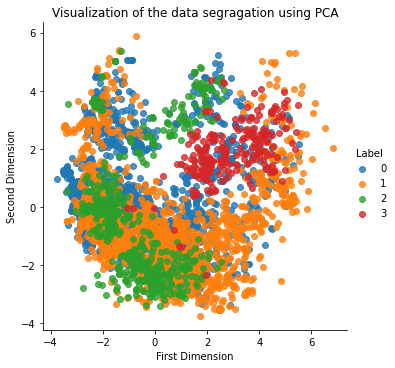

time: 813 ms (started: 2022-02-24 21:37:17 +01:00)


In [25]:
#Calling our scattering function:
scatterPlot(X_train_PCA, y_train, "PCA")

In [26]:
#Calling our scattering function:
scatterPlot3D(X_train_PCA, y_train, "PCA")

time: 2.92 s (started: 2022-02-24 21:37:18 +01:00)


In [27]:
# Variance ratio explained by each of the selected components
print(pca.explained_variance_ratio_) 
info = 0 
for index, variance in enumerate(pca.explained_variance_ratio_):
    info = info + variance
    if info >= 0.95:
        print('No of components that carry more than 95% of information are', index)
        break

[0.19828893 0.14181002 0.07957007 0.06743646 0.05130818 0.04935178
 0.04236871 0.0416     0.03448922 0.02927821 0.02753013 0.02577214
 0.02211507 0.02192049 0.02052279 0.0200516  0.01874018 0.01782089
 0.017328   0.01682971 0.01616893]
No of components that carry more than 95% of information are 20
time: 15 ms (started: 2022-02-24 21:37:21 +01:00)


## Log Loss  

In [28]:
all_instances = len(data['Class'])
values = dict()
values = data['Class'].value_counts()

ratio_Move_Forward = values[0]/all_instances
ratio_Sharp_Right_Turn = values[1]/all_instances
ratio_Slight_Right_Turn = values[2]/all_instances
ratio_Slight_Left_Turn = values[3]/all_instances

log_loss_base = -1/all_instances*(math.log(ratio_Move_Forward)*values[0] +
                                  math.log(ratio_Sharp_Right_Turn)*values[1] +
                                  math.log(ratio_Slight_Right_Turn)*values[2] +
                                  math.log(ratio_Slight_Left_Turn)*values[3] 
                                  )

print(log_loss_base)


1.1884928509974293
time: 16 ms (started: 2022-02-24 21:37:21 +01:00)


That's the statistical loss obtained without using any ML algorithms used. Our Aim is to get values significantly better than above value. 

## Logistic Regression

In [29]:
# Hyperparameters:
penalty = 'l2'
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2020
solver = 'newton-cg' # For Multi-class, also possible: 'sag', 'saga', 'lbfgs'
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 15 ms (started: 2022-02-24 21:37:21 +01:00)


In [30]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])
model = logReg

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  # log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold))
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on  CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set
loglossLogisticRegression = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)


Training Log Loss:  0.669159407017827
CV Log Loss:  0.7229605235422989
Training Log Loss:  0.6820954859706758
CV Log Loss:  0.6821420395789732
Training Log Loss:  0.665389057215909
CV Log Loss:  0.7355792887644624
Training Log Loss:  0.6804930125748183
CV Log Loss:  0.6863999986897785
Training Log Loss:  0.6795638749996833
CV Log Loss:  0.695414205515114
Logistic Regression Log Loss:  0.7044982591508441
time: 1.67 s (started: 2022-02-24 21:37:21 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.72      0.67      0.70       528
 Sharp-Right-Turn       0.69      0.78      0.73       544
     Move-Forward       0.71      0.62      0.66       208
 Slight-Left-Turn       0.64      0.56      0.59        84

         accuracy                           0.70      1364
        macro avg       0.69      0.66      0.67      1364
     weighted avg       0.70      0.70      0.70      1364



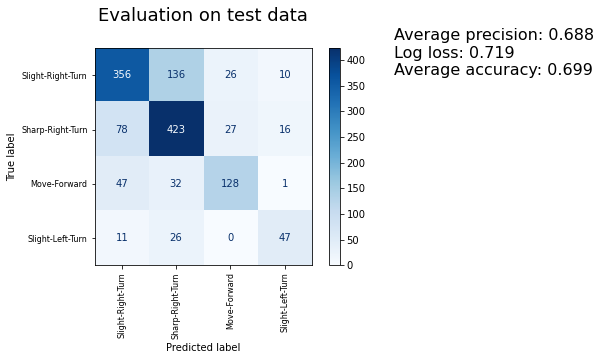

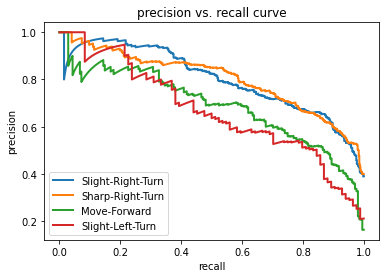

time: 875 ms (started: 2022-02-24 21:37:23 +01:00)


In [31]:
y_score = model.predict_proba(X_test)
y_score_2 = model.predict(X_test)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'Average precision: {avg_precision}\nLog loss: {test_log_loss}\nAverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

Although loss is lower than base log loss it is still pretty high. Also we can see that Precision vs Recall is not good either. 


## Gridsearch for Logistic Regression  

Let's try performing Gridsearch on above method with C and solver as Hyperparameters 

In [32]:
# Looking for the best C and solver value:
C = np.logspace(0, 3, 20)
grid = [{'C': C, 'solver':['newton-cg','sag', 'saga'], 'max_iter':[10000]}] 
#Setting the search:
# For scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
gridSearch = GridSearchCV(logReg, grid, scoring='accuracy', cv=k_fold, verbose=True, refit=True)
gridSearch.fit(X_train, y_train)
results = gridSearch.cv_results_
print('Best Accuracy obtained:', gridSearch.best_score_)
print('Best Parameters obtained:', gridSearch.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Accuracy obtained: 0.7082132483110477
Best Parameters obtained: {'C': 6.158482110660264, 'max_iter': 10000, 'solver': 'newton-cg'}
time: 1min 54s (started: 2022-02-24 21:37:24 +01:00)


## Logistic Regression with PCA

In [33]:
# Hyperparameters:
penalty = 'l2' 
C = 1.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2020
solver = 'newton-cg' # For Multi-class, also possible: 'sag', 'saga', 'lbfgs'
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 0 ns (started: 2022-02-24 21:39:18 +01:00)


In [34]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])
model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train_PCA)),y_train):

  X_train_fold, X_cv_fold = X_train_PCA.iloc[train_index,:], X_train_PCA.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  # log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold))
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set (1127)
loglossLogisticRegression = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)


Training Log Loss:  0.677910988511438
CV Log Loss:  0.7334636737606023
Training Log Loss:  0.6925104274633395
CV Log Loss:  0.685755708481248
Training Log Loss:  0.6749149633347166
CV Log Loss:  0.7434617236555561
Training Log Loss:  0.6909190451686243
CV Log Loss:  0.6899891397666934
Training Log Loss:  0.688997947315077
CV Log Loss:  0.7024683446219837
Logistic Regression Log Loss:  0.7110270249844229
time: 1.2 s (started: 2022-02-24 21:39:18 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.51      0.49      0.50       528
 Sharp-Right-Turn       0.47      0.41      0.44       544
     Move-Forward       0.25      0.36      0.30       208
 Slight-Left-Turn       0.36      0.36      0.36        84

         accuracy                           0.43      1364
        macro avg       0.40      0.40      0.40      1364
     weighted avg       0.45      0.43      0.44      1364



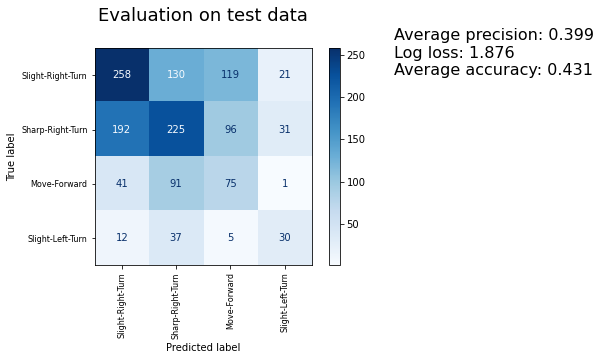

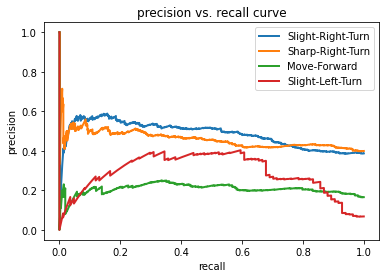

time: 969 ms (started: 2022-02-24 21:39:19 +01:00)


In [35]:
y_score = model.predict_proba(X_test_PCA)
y_score_2 = model.predict(X_test_PCA)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test_PCA, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'Average precision: {avg_precision}\nLog loss: {test_log_loss}\nAverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

## Random Forest

In [36]:
# Hyperparameters: 
n_estimators = 20
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2020
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              min_weight_fraction_leaf=min_weight_fraction_leaf,max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,class_weight=class_weight)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 0 ns (started: 2022-02-24 21:39:20 +01:00)


In [37]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])
model = RFC

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  # log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold))
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set 

loglossRFC = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('-----------------------------------')
print('RFC Log Loss: ', loglossRFC)

Training Log Loss:  0.01871971273725384
CV Log Loss:  0.06682439715947536
Training Log Loss:  0.021422558970080306
CV Log Loss:  0.07052010893885764
Training Log Loss:  0.020560701904615005
CV Log Loss:  0.061934159503724384
Training Log Loss:  0.020988411899834036
CV Log Loss:  0.09831043522045586
Training Log Loss:  0.020850111752658187
CV Log Loss:  0.05848861297001552
-----------------------------------
RFC Log Loss:  0.07121429970390686
time: 1.23 s (started: 2022-02-24 21:39:21 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.99      0.99      0.99       528
 Sharp-Right-Turn       0.99      1.00      1.00       544
     Move-Forward       1.00      0.99      0.99       208
 Slight-Left-Turn       0.99      0.96      0.98        84

         accuracy                           0.99      1364
        macro avg       0.99      0.99      0.99      1364
     weighted avg       0.99      0.99      0.99      1364



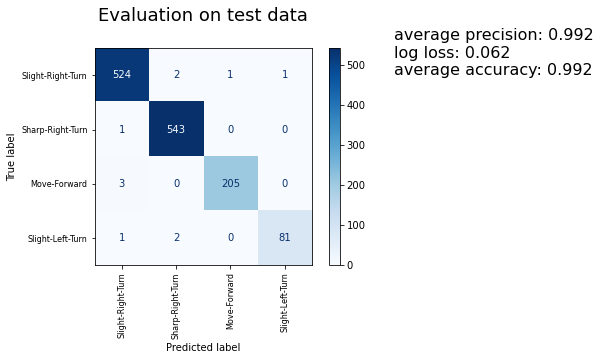

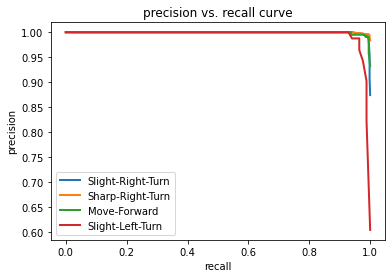

time: 657 ms (started: 2022-02-24 21:39:22 +01:00)


In [38]:
y_score = model.predict_proba(X_test)
y_score_2 = model.predict(X_test)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'average precision: {avg_precision}\nlog loss: {test_log_loss}\naverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

## Random Forest with PCA 

In [39]:
# Hyperparameters:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2020
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              min_weight_fraction_leaf=min_weight_fraction_leaf,max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,class_weight=class_weight)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 0 ns (started: 2022-02-24 21:39:22 +01:00)


In [40]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])

model = RFC

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_PCA)),y_train.ravel()):

  X_train_fold, X_cv_fold = X_train_PCA.iloc[train_index,:], X_train_PCA.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  #Fitting the model:
  model.fit(X_train_fold, y_train_fold)

  # log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold))
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set 
loglossRFC = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('-----------------------------------')
print('RFC Log Loss: ', loglossRFC)

Training Log Loss:  0.11178273065793681
CV Log Loss:  0.9142101391966297
Training Log Loss:  0.11447084936948368
CV Log Loss:  0.73812107173631
Training Log Loss:  0.11364675654499069
CV Log Loss:  0.8794975084721207
Training Log Loss:  0.12069437413793867
CV Log Loss:  0.8274500520936761
Training Log Loss:  0.11727342439380004
CV Log Loss:  0.6212428060449583
-----------------------------------
RFC Log Loss:  0.7961190082213282
time: 719 ms (started: 2022-02-24 21:39:22 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.55      0.72      0.62       528
 Sharp-Right-Turn       0.55      0.59      0.57       544
     Move-Forward       0.32      0.09      0.14       208
 Slight-Left-Turn       0.70      0.25      0.37        84

         accuracy                           0.54      1364
        macro avg       0.53      0.41      0.42      1364
     weighted avg       0.52      0.54      0.51      1364



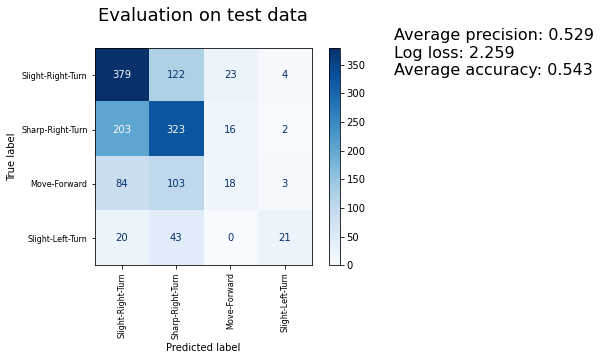

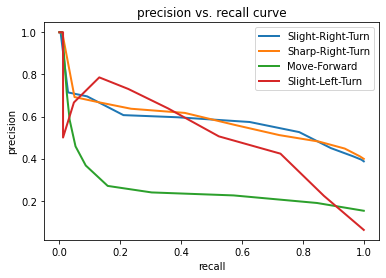

time: 641 ms (started: 2022-02-24 21:39:23 +01:00)


In [41]:
y_score = model.predict_proba(X_test_PCA)
y_score_2 = model.predict(X_test_PCA)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test_PCA, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'Average precision: {avg_precision}\nLog loss: {test_log_loss}\nAverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

## Gradient Decent

In [42]:
# Hyperparameters: 
loss = 'log' #Since we are looking into log loss.
penalty = 'l2'
alpha = 0.0003906939937054617 # Regularization constant. Higher the value, higher the regularization.
learning_rate = 'optimal'
l1_ratio = 0.15
early_stopping = False # if true, terminate training when validation score is not improving. 
validation_fraction = 0.05 # portion of the training dataset utilized if early stopping is True. 
random_state = 2020

SGD = SGDClassifier(loss=loss, penalty=penalty, alpha=alpha,l1_ratio=l1_ratio, early_stopping=early_stopping, learning_rate=learning_rate, validation_fraction= validation_fraction, random_state=random_state)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 0 ns (started: 2022-02-24 21:39:24 +01:00)


In [43]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])
model = SGD

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):

  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  # log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,:])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set 
loglossSGD = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('-----------------------------------')
print('SGD Log Loss: ', loglossSGD)

Training Log Loss:  0.731697617334737
CV Log Loss:  0.7847973941935025
Training Log Loss:  0.7232015494122039
CV Log Loss:  0.7097049341448924
Training Log Loss:  0.7040330706492413
CV Log Loss:  0.7652619444360422
Training Log Loss:  0.723601609589024
CV Log Loss:  0.7382184976762789
Training Log Loss:  0.7230846035430236
CV Log Loss:  0.7399124419393631
-----------------------------------
SGD Log Loss:  0.747578882224688
time: 797 ms (started: 2022-02-24 21:39:24 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.65      0.70      0.67       528
 Sharp-Right-Turn       0.66      0.73      0.69       544
     Move-Forward       0.67      0.47      0.55       208
 Slight-Left-Turn       0.67      0.45      0.54        84

         accuracy                           0.66      1364
        macro avg       0.66      0.59      0.61      1364
     weighted avg       0.66      0.66      0.65      1364



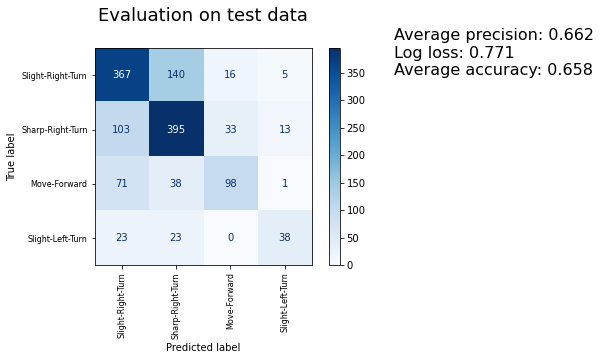

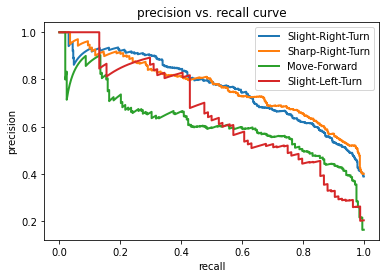

time: 547 ms (started: 2022-02-24 21:39:25 +01:00)


In [44]:
y_score = model.predict_proba(X_test)
y_score_2 = model.predict(X_test)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'Average precision: {avg_precision}\nLog loss: {test_log_loss}\nAverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

In [45]:
# Looking for the best alpha value:
alpha = np.logspace(-5, 1, 50)
grid = [{'alpha': alpha }] 
#Setting the search:
# For scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
gridSearch = GridSearchCV(SGD, grid, scoring='accuracy', cv=k_fold, verbose=True, refit=True)
gridSearch.fit(X_train, y_train)
results = gridSearch.cv_results_
print('Best Accuracy obtained:', gridSearch.best_score_)
print('Best Parameters obtained:', gridSearch.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Accuracy obtained: 0.6881709162882756
Best Parameters obtained: {'alpha': 0.0003906939937054617}
time: 28.7 s (started: 2022-02-24 21:39:25 +01:00)


## Gradient Decent with PCA

In [46]:
# Hyperparameters:
loss = 'log' #Since we are looking into log loss.
penalty = 'l2'
alpha = 0.0001 # Regularization constant. Higher the value, higher the regularization.
learning_rate = 'optimal'
l1_ratio = 0.15
early_stopping = False # if true, terminate training when validation score is not improving. 
validation_fraction = 0.05 # portion of the training dataset utilized if early stopping is True. 
random_state = 2020

SGD = SGDClassifier(loss=loss, penalty=penalty, alpha=alpha,l1_ratio=l1_ratio, early_stopping=early_stopping, learning_rate=learning_rate, validation_fraction= validation_fraction, random_state=random_state)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

time: 0 ns (started: 2022-02-24 21:39:54 +01:00)


In [47]:
# Model Training:
#Lists for storing scores
trainingScores = []
cvScores = []

predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])

model = SGD

#kfold.split will generate indices to split data into training and test set (cv):
for train_index, cv_index in k_fold.split(np.zeros(len(X_train_PCA)),y_train.ravel()):

  X_train_fold, X_cv_fold = X_train_PCA.iloc[train_index,:], X_train_PCA.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)

  #log loss in the training dataset. 
  loglossTraining = log_loss(y_train_fold,model.predict_proba(X_train_fold)[:,:])
  #Saving our analysis on the list:
  trainingScores.append(loglossTraining)

  #Log loss on CV dataset:
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] =model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold,predictionsBasedOnKFolds.loc[X_cv_fold.index,:])
  #Saving our analysis on the list:
  cvScores.append(loglossCV)

  #printing the results:
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)

#log loss for the entire training set
loglossSGD = log_loss(y_train,predictionsBasedOnKFolds.loc[:,:])
print('-----------------------------------')
print('SGD Log Loss: ', loglossSGD)

Training Log Loss:  0.7572756843338297
CV Log Loss:  0.817556583750492
Training Log Loss:  0.7750363946205584
CV Log Loss:  0.7508550502558835
Training Log Loss:  0.7474966732301009
CV Log Loss:  0.7991555490683028
Training Log Loss:  0.8293403424007441
CV Log Loss:  0.8122483880626064
Training Log Loss:  0.7639452256025037
CV Log Loss:  0.7660301856952892
-----------------------------------
SGD Log Loss:  0.7891667254943919
time: 1.56 s (started: 2022-02-24 21:39:54 +01:00)


                   precision    recall  f1-score   support

Slight-Right-Turn       0.54      0.52      0.53       528
 Sharp-Right-Turn       0.44      0.47      0.45       544
     Move-Forward       0.22      0.23      0.22       208
 Slight-Left-Turn       0.27      0.21      0.24        84

         accuracy                           0.44      1364
        macro avg       0.37      0.36      0.36      1364
     weighted avg       0.44      0.44      0.44      1364



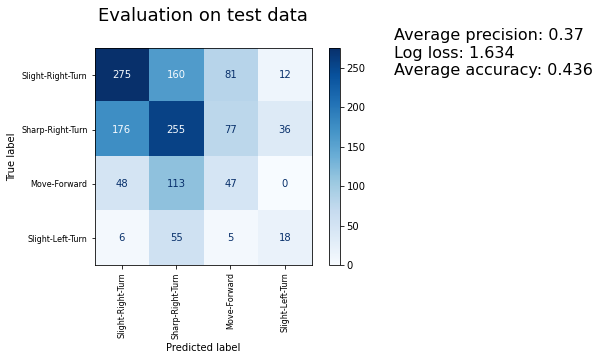

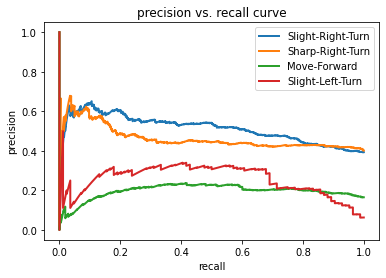

time: 828 ms (started: 2022-02-24 21:39:56 +01:00)


In [48]:
y_score = model.predict_proba(X_test_PCA)
y_score_2 = model.predict(X_test_PCA)
activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}

#creating classification Report
report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
print(classification_report(y_test, y_score_2, target_names=activity))
y_bin = pp.label_binarize(y_test, classes=model.classes_)

precision = dict()
recall = dict()
average_precision = dict()
classes = model.classes_

test_log_loss = round(log_loss(y_test, y_score), 3)

#plotting Confusion Matrix
plot_confusion_matrix(model, X=X_test_PCA, y_true=y_test, labels=model.classes_, cmap='Blues')
plt.xticks(np.arange(len(activity)), activity, fontsize=8, rotation=90)
plt.yticks(np.arange(len(activity)), activity, fontsize=8, rotation=0)
avg_precision = round(report['macro avg']['precision'],3)
avg_accuracy = round(report['accuracy'],3)
plt.text(5, 0, f'Average precision: {avg_precision}\nLog loss: {test_log_loss}\nAverage accuracy: {avg_accuracy}', fontsize=16)
plt.title('Evaluation on test data\n', fontsize=18)
plt.show()

#Precision and Recall Curve
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_bin[:, i], y_score[:, i])
    #print('\n average precision: ', classes[i], ': ', average_precision[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(classes[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(activity)
plt.title("precision vs. recall curve")
plt.show()

## Conclusions for Phase I: 


Out of three models implemented here Random Forest was the best model fit which gave more than 99% accuracy. 
Logistic Regression, Gradient Decent were although better than statistical log loss still had a high error of about 30 - 35%, which suggests that data contained high non-linerity which only Random Forest could handle. 

PCA Analysis reduces number of components from 24 to 21 (20%reduction) and thus instead improving the results it worsens it. 
Massive drop in all the Evaluation parameters was seen when PCA was implemented. 

gridsearch was implemented on LR and GD but it fails to further improve any results. 

Observing the confusion Matrix it can be seen that activity Sharp-right-Turn had most errors. It seems that the model had particular hard time recognizing this label. 

Log Losses:
Statistical Log Loss - 1.19;
Logistic Regression - 0.7;
Log Reg with PCA - 1.86;
Random Forest - 0.06;
RF with PCA - 2.25;
Gradient Decent - 0.77;
Gradient Decent with PCA - 1.6;


# 4. Testing Phase II: Model Development

Dataset: 
First of all here we have multi-Class classification problem and to deal with the conversion of the labels from its actual value to numerical value we need to convert the label column into one hot vectors. Which will create 4 separate columns of 0&1 for each label. 

1. Activation Functions 
    1. For Input at first I have used Relu Activation function. Once it is implemented I will also try different Activation functions 
    2. For Output as I have multiple outputs, I will use softmax function. 

2. Number of hidden layers and neurons 
    1. Dataset contains 4092 lines so it can be considered as small dataset. 
    2. I will start with 2 layers and 32 neurons 

3. Loss 
    For multiclass single label classification problem categorical cross entropy is a suitable loss function 

4. Metric 
    Accuracy and Precision

5. Optimizer
    As it is the fastest option available I will be using rmsprop at first and then try Adam subsequent iteration 

6. Batch size and Epochs 
    1. 2-32 batch size gives best performance so I will start with 10 
    2. Epochs 100 



In [49]:
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()

#Rescaling the data
featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
#Looking into the statistics again:
dataX.describe()


US1           US2           US3           US4           US5  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   1.525336e-16 -2.296143e-16  3.708340e-16  6.742447e-16 -1.648878e-16   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -1.334970e+00 -1.340440e+00 -1.618948e+00 -1.499717e+00 -1.372974e+00   
25%   -6.859332e-01 -6.844195e-01 -7.621114e-01 -8.138268e-01 -8.845867e-01   
50%   -1.701916e-01 -2.996723e-01 -3.410086e-01 -2.585463e-01 -2.177220e-01   
75%    4.265239e-01  2.513850e-01  2.003519e-01  9.906439e-01  1.012580e+00   
max    4.395492e+00  1.913422e+00  2.036087e+00  1.696011e+00  1.524490e+00   

                US6           US7           US8           US9          US10  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   6.643330e-16  1.792290e-15 -1.059351e-16 -1.623783e-15 -1.298204e-15   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -1.387237e+00 -1.576947e+00 -1.512792e+00 -1.687465e+00 -1.546494e+00   
25%   -8.634383e-01 -1.004811e+00 -8.299019e-01 -9.771752e-01 -9.148618e-01   
50%   -1.641949e-01 -8.886278e-02 -3.314551e-01 -2.385108e-01 -1.172924e-01   
75%    7.346653e-01  1.166476e+00  5.871626e-01  1.381429e+00  5.305894e-01   
max    1.646781e+00  1.172136e+00  2.291239e+00  1.381429e+00  1.674371e+00   

       ...          US15          US16          US17          US18  \
count  ...  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean   ...  6.902063e-16  8.947307e-17  1.376384e-16  1.207897e-16   
std    ...  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min    ... -9.973735e-01 -7.083607e-01 -6.548184e-01 -6.254159e-01   
25%    ... -7.845799e-01 -4.662052e-01 -4.340089e-01 -4.278208e-01   
50%    ... -5.114462e-01 -3.633346e-01 -2.673402e-01 -2.532738e-01   
75%    ...  1.300360e+00 -3.924673e-02 -8.156297e-02 -8.238068e-02   
max    ...  1.629024e+00  3.457443e+00  4.257131e+00  4.598066e+00   

               US19          US20          US21          US22          US23  \
count  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03  5.456000e+03   
mean  -1.187294e-16  2.990439e-16  2.460153e-17  1.452081e-16 -7.699934e-17   
std    1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00  1.000092e+00   
min   -6.274305e-01 -6.319648e-01 -7.166474e-01 -8.959573e-01 -9.200175e-01   
25%   -4.675389e-01 -4.683490e-01 -5.059095e-01 -6.586107e-01 -5.908992e-01   
50%   -3.207532e-01 -3.358355e-01 -2.839021e-01 -4.756693e-01 -3.748427e-01   
75%   -1.757149e-01 -1.868947e-01 -1.540848e-02  1.846696e-01  3.449724e-03   
max    3.444126e+00  3.437623e+00  4.489819e+00  2.050195e+00  2.667759e+00   

               US24  
count  5.456000e+03  
mean  -1.049279e-16  
std    1.000092e+00  
min   -1.044450e+00  
25%   -6.037235e-01  
50%   -2.516642e-01  
75%    6.844896e-02  
max    2.974242e+00  

[8 rows x 24 columns]

time: 125 ms (started: 2022-02-24 21:39:56 +01:00)


Here I will create one hot vector for y_train and y_test 

In [50]:
#Splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.20, random_state=2020)

#creating one hot vectors 
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=4)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=4)
#K-fold Cross Validation  
k_fold = KFold(n_splits=5, shuffle=True, random_state=2020)


time: 16 ms (started: 2022-02-24 21:39:57 +01:00)


## Creating Neural network 

In [51]:
'''
def b_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32, 48, 64]),
      activation='relu'))
  model.add(keras.layers.Dense(4, activation='softmax'))
  model.compile(loss='categorical_crossentropy')
  return model
'''

"\ndef b_model(hp):\n  model = keras.Sequential()\n  model.add(keras.layers.Dense(\n      hp.Choice('units', [8, 16, 32, 48, 64]),\n      activation='relu'))\n  model.add(keras.layers.Dense(4, activation='softmax'))\n  model.compile(loss='categorical_crossentropy')\n  return model\n"

time: 15 ms (started: 2022-02-24 21:39:57 +01:00)


In [52]:
#pip install keras-tuner --upgrade

time: 0 ns (started: 2022-02-24 21:39:57 +01:00)


In [53]:
'''import keras_tuner as kt
tuner = kt.RandomSearch(
    b_model,
    objective='val_loss',
    max_trials=5)
'''

"import keras_tuner as kt\ntuner = kt.RandomSearch(\n    b_model,\n    objective='val_loss',\n    max_trials=5)\n"

time: 0 ns (started: 2022-02-24 21:39:57 +01:00)


keras Tuner was unable to save the log files to my local pc which I could not solve and thus could not implement. 

In [54]:
#tuner.search(X_train, y_train_one_hot, epochs=150, validation_data=(X_test, y_test_one_hot))
#best_model = tuner.get_best_models()[0]
#status.expect_partial()

time: 0 ns (started: 2022-02-24 21:39:57 +01:00)


In [55]:
def build_model(hyperparameter):
    model = models.Sequential()
    
    if hyperparameter['weight regularisation l2']!='-':
        kernel_regularizer = regularizers.l2(hyperparameter['weight regularisation l2'])
    else:
        kernel_regularizer = None
    
    #defining the first hidden layer 
    model.add(layers.Dense(hyperparameter['units_hidden_layer'], kernel_regularizer =kernel_regularizer ,
                           kernel_initializer=hyperparameter['initialization'], activation= hyperparameter['activation_hidden'],
                           input_shape=(X_train.shape[1],)))
    #model.add(BatchNormalization())
    if hyperparameter['dropout'] != '-':
        model.add(layers.Dropout(hyperparameter['dropout']))
    
    for i in range(hyperparameter['hidden_layer'] - 1):
        model.add(layers.Dense(hyperparameter['units_hidden_layer'], 
                               kernel_regularizer = kernel_regularizer , kernel_initializer=hyperparameter['initialization'],
                               activation= hyperparameter['activation_hidden']))
        #model.add(BatchNormalization())
        if hyperparameter['dropout'] != '-':
            model.add(layers.Dropout(hyperparameter['dropout']))
    #Output Layer 
    model.add(layers.Dense(4, kernel_regularizer =kernel_regularizer , kernel_initializer=hyperparameter['initialization'], 
                           activation= hyperparameter['activation_output']))
    model.compile()
    model.compile(optimizer=hyperparameter['optimizer'], loss=hyperparameter['loss'], metrics=[hyperparameter['metric_1'], 
                                                                                               hyperparameter['metric_2']])
    
    return model

time: 16 ms (started: 2022-02-24 21:39:57 +01:00)


In [56]:
def plot_learning_curves(history, parameters): 
    parameter_legend = ''
    for parameter, value in parameters.items(): 
        parameter_legend = parameter_legend + str(parameter) + ': ' + str(value) + '\n'
        
    #Omitting first 10 values for better visualization
    plt.plot(history['epoch'],history['loss'], "k--", linewidth=1.5, label="Training")
    plt.plot(history['epoch'],history['val_loss'], "b-.", linewidth=1.5, label="CV test")
    plt.legend()
    plt.ylim(0,1)
    #plt.yscale("log")
    plt.xlabel("Epochs"),  plt.ylabel("Categorical Crossentropy")
    print(parameter_legend)

time: 0 ns (started: 2022-02-24 21:39:57 +01:00)


In [61]:
def model_training(hyperparameter, name):
    
    training_Scores = []
    cv_Scores = []
    
    #predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index,columns=[0,1,2,3])
    #Checkpoint callback    
    myCheckpoint= keras.callbacks.ModelCheckpoint(f"{name}.h5",monitor='val_loss', mode='min', save_best_only=True)
    #To create interactive plots with tensorboard
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir='log_DDE\\{}'.format(name), histogram_freq=1 )
    #Early stop callback  
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
    #List of Callbacks
    callback_list = [myCheckpoint, tb_callback, early_stop]
    
    for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train):
        X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
        y_train_fold, y_cv_fold = y_train_one_hot[train_index], y_train_one_hot[cv_index]

        model = build_model(hyperparameter)

        #Training step: verbose = 0 trains the model in silent mode 
        history = model.fit(X_train_fold, y_train_fold, epochs=hyperparameter['num_epochs'], 
                            batch_size=hyperparameter['batch_size'], 
                            validation_data=(X_cv_fold, y_cv_fold), 
                            callbacks=[callback_list], verbose=0)
    
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch

        #Evaluating the training performance:
        train_loss, train_acc, train_precision = model.evaluate(X_train_fold, y_train_fold, verbose=0)
        trainingScores.append(train_loss)
        print('--------------------------------------------------------')
        print('Evaluation of training Data: \n', 'training loss: ', train_loss, 'training accuracy: ', train_acc)

        #Evaluating the CV pperformance:
        val_loss, val_acc, val_precision = model.evaluate(X_cv_fold, y_cv_fold, verbose=0)
        cvScores.append(val_loss)
        print('Evaluation of validation Data: \n', 'cv loss: ', val_loss, 'cv accuracy: ', val_acc)

    training_total_loss, training_total_acc, training_total_precision = model.evaluate(X_train, y_train_one_hot, verbose=0)
    testing_loss, testing_acc, test_precision = model.evaluate(X_test, y_test_one_hot, verbose=0)
    print('--------------------------------------------------------')
    print('Loss for the training dataset: ', training_total_loss)
    print('--------------------------------------------------------')
    print('Accuracy for the training dataset: ', training_total_acc)
    print('--------------------------------------------------------')
    print('Precision for the training dataset: ', training_total_precision )
    print('--------------------------------------------------------')
    print('Loss for the testing dataset: ', testing_loss)
    model.save(f'{name}.h5')

    # graphs
    plot_learning_curves(hist, hyperparameter)
    plt.title(f'Accuracy the Training Data: {round(training_total_acc,2)}', fontsize=16)
    plt.show()   

time: 15 ms (started: 2022-02-24 21:42:27 +01:00)


In [62]:
#testing 
def evaluate_model_test_data(model):
    activity ={'Move-Forward','Sharp-Right-Turn','Slight-Right-Turn', 'Slight-Left-Turn'}    
    y_score = model.predict(X_test).argmax(axis=-1)
    y_score_2 = pd.DataFrame(model.predict(X_test).argmax(axis=-1))[0]
    
    report = classification_report(y_test, y_score_2, target_names=activity, output_dict=True)
    print(classification_report(y_test, y_score_2, target_names=activity,  output_dict=False))
    
    testing_loss, testing_acc, test_precision = model.evaluate(X_test, y_test_one_hot, verbose=0)
    
    confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_score, num_classes=4, name=activity)
    plt.matshow(confusion_matrix, cmap=plt.cm.Blues) 
    plt.xticks(np.arange(len(activity)), activity, fontsize=10, rotation=90)
    plt.yticks(np.arange(len(activity)), activity, fontsize=10, rotation=0)
    plt.text(5, 0, f'Average Precision: {round(test_precision, 3)}\nLog Loss: {round(testing_loss,3)}\nAverage Accuracy: {round(testing_acc,3)}', fontsize=16)
    
    plt.title('Evaluation on test data\n', fontsize=18) 
    plt.xlabel('Predicted Labels') 
    plt.ylabel('True Labels') 
    for (i, j), z in np.ndenumerate(confusion_matrix):
        plt.text(j, i, '{}'.format(z), ha='center', va='center')
    plt.colorbar()
    plt.show()  

time: 0 ns (started: 2022-02-24 21:42:27 +01:00)


In [63]:
# Hyperparameters
hyperparameter = {'num_epochs':100, 'batch_size':10,'hidden_layer':2, 'units_hidden_layer': 32,
               'activation_hidden': 'relu',
               'activation_output': 'softmax',
               'loss': 'categorical_crossentropy',
               'metric_1': 'accuracy',
               'metric_2': 'Precision',
               'optimizer': 'rmsprop', # rmsprop
               'initialization': 'glorot_uniform',
               'weight regularisation l2': '-',
               'dropout': '-', 
               } 

time: 0 ns (started: 2022-02-24 21:42:28 +01:00)


# 5. Testing Phase III: Model Regularization and Hyperparameter optimization 

## Base Model 

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15630273520946503 training accuracy:  0.948438823223114
Evaluation of validation Data: 
 cv loss:  0.30463656783103943 cv accuracy:  0.9083619713783264
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17174024879932404 training accuracy:  0.9395588636398315
Evaluation of validation Data: 
 cv loss:  0.32440516352653503 cv accuracy:  0.8991981744766235
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.11249102652072906 training accuracy:  0.9636207222938538
Evaluation of validation Data: 
 cv loss:  0.28966206312179565 cv accuracy:  0.9209622144699097
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14720427989959717 training accuracy:  0.951016902923584
Evaluation of validation Data: 
 cv loss:  0.35087254643440247

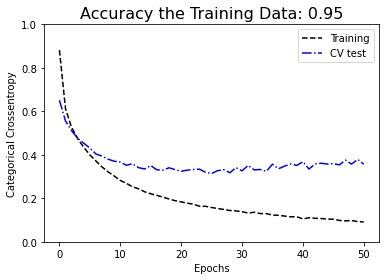

time: 4min 44s (started: 2022-02-24 21:42:30 +01:00)


In [64]:
model_training(hyperparameter, 'Base_model')

Here we have good Accuracy but in the graph we can see that model overfits on test dataset. In further tuning we need to address this issue. 

## Number of Neurons

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.3507288694381714 training accuracy:  0.8745344877243042
Evaluation of validation Data: 
 cv loss:  0.415590763092041 cv accuracy:  0.8442153334617615
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.490800678730011 training accuracy:  0.8255513906478882
Evaluation of validation Data: 
 cv loss:  0.5673253536224365 cv accuracy:  0.7915234565734863
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.5043607354164124 training accuracy:  0.823546290397644
Evaluation of validation Data: 
 cv loss:  0.5478658676147461 cv accuracy:  0.7983963489532471
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.6049090027809143 training accuracy:  0.7527928948402405
Evaluation of validation Data: 
 cv loss:  0.651189386844635 cv accura

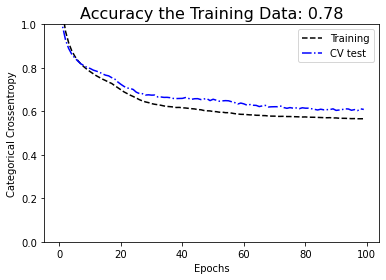

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.21638962626457214 training accuracy:  0.9283872842788696
Evaluation of validation Data: 
 cv loss:  0.3272830843925476 cv accuracy:  0.8854524493217468
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.21473896503448486 training accuracy:  0.9246634244918823
Evaluation of validation Data: 
 cv loss:  0.2982109487056732 cv accuracy:  0.8854524493217468
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.25431808829307556 training accuracy:  0.9172157049179077
Evaluation of validation Data: 
 cv loss:  0.3326328694820404 cv accuracy:  0.8843069672584534
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19672203063964844 training accuracy:  0.9346892237663269
Evaluation of validation Data: 
 cv loss:  0.37112361192703247 

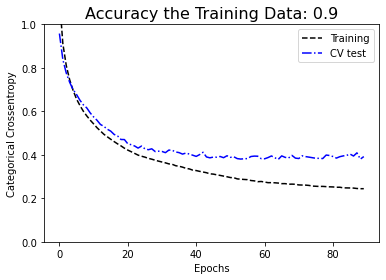

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14367656409740448 training accuracy:  0.9533085227012634
Evaluation of validation Data: 
 cv loss:  0.3349033296108246 cv accuracy:  0.9095074534416199
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.13017971813678741 training accuracy:  0.9530220627784729
Evaluation of validation Data: 
 cv loss:  0.342072993516922 cv accuracy:  0.9140893220901489
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.18294435739517212 training accuracy:  0.9415640234947205
Evaluation of validation Data: 
 cv loss:  0.30660295486450195 cv accuracy:  0.9083619713783264
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1777244657278061 training accuracy:  0.9461472630500793
Evaluation of validation Data: 
 cv loss:  0.36073824763298035 c

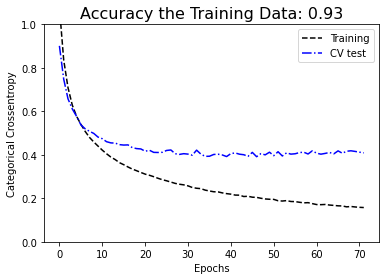

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12625466287136078 training accuracy:  0.9590375423431396
Evaluation of validation Data: 
 cv loss:  0.31543946266174316 cv accuracy:  0.9026346206665039
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14653414487838745 training accuracy:  0.953594982624054
Evaluation of validation Data: 
 cv loss:  0.3063528835773468 cv accuracy:  0.904925525188446
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.13010439276695251 training accuracy:  0.960183322429657
Evaluation of validation Data: 
 cv loss:  0.28233450651168823 cv accuracy:  0.9095074534416199
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12803536653518677 training accuracy:  0.9570323824882507
Evaluation of validation Data: 
 cv loss:  0.34215375781059265 c

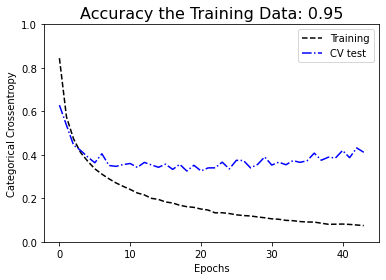

time: 16min 3s (started: 2022-02-24 21:47:14 +01:00)


In [65]:
hyperparameter['units_hidden_layer'] = 4
model_training(hyperparameter, '4Neurons')

hyperparameter['units_hidden_layer'] = 8
model_training(hyperparameter, '8Neurons')

hyperparameter['units_hidden_layer'] = 16
model_training(hyperparameter, '16Neurons')

hyperparameter['units_hidden_layer'] = 48
model_training(hyperparameter, '48Neurons')



Increasing the neurons worsens the overfitting problem whereas reducing neurons significantly reduces accuracy of the model 

## Number of different Layers 

I will consider 16 & 32 neurons for investigation of different layers  

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17249445617198944 training accuracy:  0.9415640234947205
Evaluation of validation Data: 
 cv loss:  0.3092026114463806 cv accuracy:  0.9060710072517395
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.18036068975925446 training accuracy:  0.9412775635719299
Evaluation of validation Data: 
 cv loss:  0.2861596345901489 cv accuracy:  0.9106529355049133
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.18642963469028473 training accuracy:  0.9412775635719299
Evaluation of validation Data: 
 cv loss:  0.3272407352924347 cv accuracy:  0.9037800431251526
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.20391814410686493 training accuracy:  0.9318246841430664
Evaluation of validation Data: 
 cv loss:  0.36640140414237976 

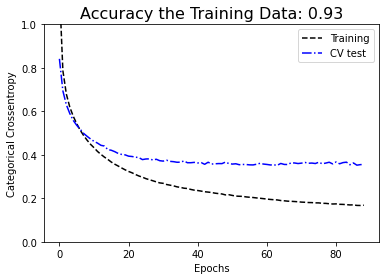

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16644315421581268 training accuracy:  0.9470065832138062
Evaluation of validation Data: 
 cv loss:  0.3120153546333313 cv accuracy:  0.9117984175682068
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.13335257768630981 training accuracy:  0.9578917026519775
Evaluation of validation Data: 
 cv loss:  0.2967786490917206 cv accuracy:  0.9266895651817322
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16305960714817047 training accuracy:  0.9467201232910156
Evaluation of validation Data: 
 cv loss:  0.2930264174938202 cv accuracy:  0.9106529355049133
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19134989380836487 training accuracy:  0.9329705238342285
Evaluation of validation Data: 
 cv loss:  0.3655966818332672 c

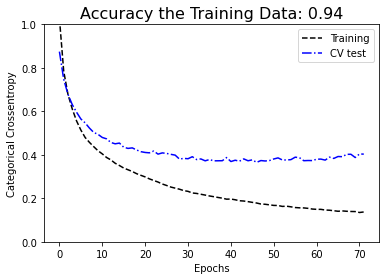

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1871468871831894 training accuracy:  0.9372672438621521
Evaluation of validation Data: 
 cv loss:  0.36995813250541687 cv accuracy:  0.8751431703567505
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12298619747161865 training accuracy:  0.9624749422073364
Evaluation of validation Data: 
 cv loss:  0.27504801750183105 cv accuracy:  0.9209622144699097
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1318112015724182 training accuracy:  0.9613291025161743
Evaluation of validation Data: 
 cv loss:  0.30591368675231934 cv accuracy:  0.9175257682800293
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19675473868846893 training accuracy:  0.9303924441337585
Evaluation of validation Data: 
 cv loss:  0.37927544116973877

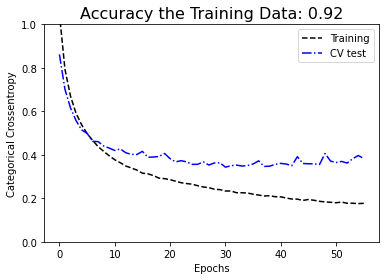

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16112825274467468 training accuracy:  0.9438556432723999
Evaluation of validation Data: 
 cv loss:  0.3654106557369232 cv accuracy:  0.8843069672584534
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15442794561386108 training accuracy:  0.9444285035133362
Evaluation of validation Data: 
 cv loss:  0.31018415093421936 cv accuracy:  0.9060710072517395
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16591119766235352 training accuracy:  0.9452878832817078
Evaluation of validation Data: 
 cv loss:  0.3582151234149933 cv accuracy:  0.8957617282867432
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17543326318264008 training accuracy:  0.9349756240844727
Evaluation of validation Data: 
 cv loss:  0.39244845509529114

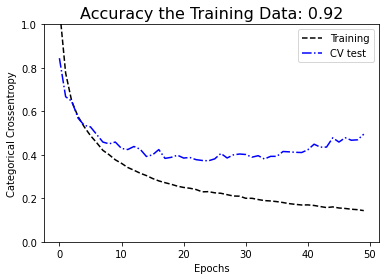

time: 11min 20s (started: 2022-02-24 22:03:18 +01:00)


In [66]:
hyperparameter['units_hidden_layer'] = 16

hyperparameter['hidden_layer'] = 1
model_training(hyperparameter, '1hidden_16')

hyperparameter['hidden_layer'] = 2
model_training(hyperparameter, '2hidden_16')

hyperparameter['hidden_layer'] = 3
model_training(hyperparameter, '3hidden_16')

hyperparameter['hidden_layer'] = 4
model_training(hyperparameter, '4hidden_16')

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15617823600769043 training accuracy:  0.9564594626426697
Evaluation of validation Data: 
 cv loss:  0.2830711901187897 cv accuracy:  0.9095074534416199
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15328140556812286 training accuracy:  0.9481523633003235
Evaluation of validation Data: 
 cv loss:  0.28257668018341064 cv accuracy:  0.9014891386032104
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14940670132637024 training accuracy:  0.9504439830780029
Evaluation of validation Data: 
 cv loss:  0.2761210799217224 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12807956337928772 training accuracy:  0.9604697823524475
Evaluation of validation Data: 
 cv loss:  0.2979298532009125 

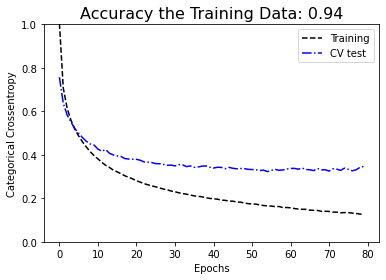

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1265738308429718 training accuracy:  0.9593240022659302
Evaluation of validation Data: 
 cv loss:  0.29266875982284546 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.08074286580085754 training accuracy:  0.9747923016548157
Evaluation of validation Data: 
 cv loss:  0.3068596422672272 cv accuracy:  0.9243986010551453
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14465266466140747 training accuracy:  0.9504439830780029
Evaluation of validation Data: 
 cv loss:  0.28038278222084045 cv accuracy:  0.907216489315033
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.18148191273212433 training accuracy:  0.9378401637077332
Evaluation of validation Data: 
 cv loss:  0.36649787425994873 

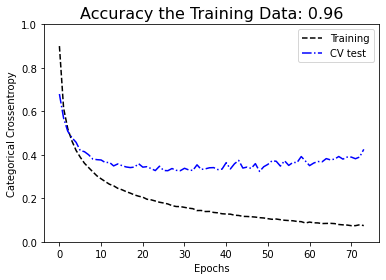

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1386277675628662 training accuracy:  0.9530220627784729
Evaluation of validation Data: 
 cv loss:  0.3407078683376312 cv accuracy:  0.8934707641601562
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16727681457996368 training accuracy:  0.9378401637077332
Evaluation of validation Data: 
 cv loss:  0.3255815804004669 cv accuracy:  0.8923253417015076
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.10799473524093628 training accuracy:  0.9624749422073364
Evaluation of validation Data: 
 cv loss:  0.3014039993286133 cv accuracy:  0.9095074534416199
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1704968363046646 training accuracy:  0.9384130835533142
Evaluation of validation Data: 
 cv loss:  0.32417917251586914 cv

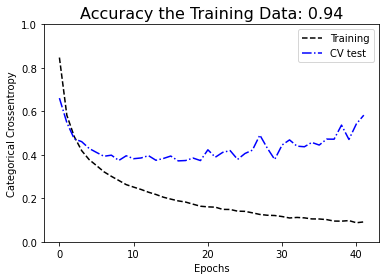

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15830349922180176 training accuracy:  0.9441421031951904
Evaluation of validation Data: 
 cv loss:  0.3343524634838104 cv accuracy:  0.8808705806732178
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.20242832601070404 training accuracy:  0.9283872842788696
Evaluation of validation Data: 
 cv loss:  0.3740333914756775 cv accuracy:  0.8774341344833374
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15199396014213562 training accuracy:  0.9501575231552124
Evaluation of validation Data: 
 cv loss:  0.3465713560581207 cv accuracy:  0.8923253417015076
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2343510240316391 training accuracy:  0.9163563251495361
Evaluation of validation Data: 
 cv loss:  0.3786030411720276 cv

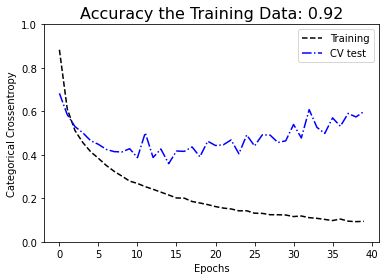

time: 8min 36s (started: 2022-02-24 22:14:39 +01:00)


In [67]:
hyperparameter['units_hidden_layer'] = 32

hyperparameter['hidden_layer'] = 1
model_training(hyperparameter, '1hidden_32')

hyperparameter['hidden_layer'] = 2
model_training(hyperparameter, '2hidden_32')

hyperparameter['hidden_layer'] = 3
model_training(hyperparameter, '3hidden_32')

hyperparameter['hidden_layer'] = 4
model_training(hyperparameter, '4hidden_32')

With 32 neurons and 1 hidden layer we get an excellent result among all the considered options. 
The overfitting problem has become better but it still exists. which will be addressed using further parameter tuning. 

## Dropout 

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16265390813350677 training accuracy:  0.9501575231552124
Evaluation of validation Data: 
 cv loss:  0.2924858629703522 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16457003355026245 training accuracy:  0.9524491429328918
Evaluation of validation Data: 
 cv loss:  0.26293274760246277 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16795089840888977 training accuracy:  0.9498711228370667
Evaluation of validation Data: 
 cv loss:  0.2500947117805481 cv accuracy:  0.9221076965332031
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1463371217250824 training accuracy:  0.9564594626426697
Evaluation of validation Data: 
 cv loss:  0.30630794167518616 

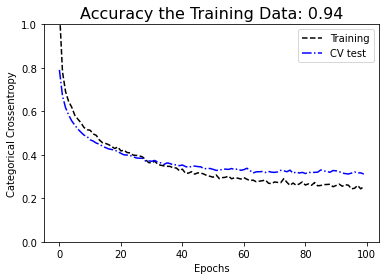

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1909450888633728 training accuracy:  0.9407046437263489
Evaluation of validation Data: 
 cv loss:  0.32387775182724 cv accuracy:  0.9095074534416199
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19493193924427032 training accuracy:  0.939272403717041
Evaluation of validation Data: 
 cv loss:  0.2631595730781555 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1829916536808014 training accuracy:  0.9432827234268188
Evaluation of validation Data: 
 cv loss:  0.28224316239356995 cv accuracy:  0.9186712503433228
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17490382492542267 training accuracy:  0.9458608031272888
Evaluation of validation Data: 
 cv loss:  0.29899612069129944 cv a

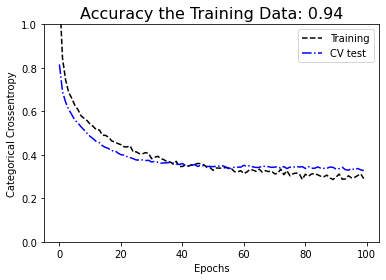

time: 7min 3s (started: 2022-02-24 22:23:15 +01:00)


In [68]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32

hyperparameter['dropout'] = 0.2
model_training(hyperparameter, 'dropout0_2')

hyperparameter['dropout'] = 0.3
model_training(hyperparameter, 'dropout0_3')

Dropout of 0.2 works well with out data without compromising much on Accuracy of the model. Overfitting problem is significantly reduced. 

Similar results can also be achieved by BatchNormalization method. But it cannot be combined with Dropout. 

## Weight Regularisation 

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.18804293870925903 training accuracy:  0.9407046437263489
Evaluation of validation Data: 
 cv loss:  0.32666316628456116 cv accuracy:  0.9060710072517395
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16655060648918152 training accuracy:  0.9501575231552124
Evaluation of validation Data: 
 cv loss:  0.28260722756385803 cv accuracy:  0.9163802862167358
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16138151288032532 training accuracy:  0.9492982029914856
Evaluation of validation Data: 
 cv loss:  0.28343063592910767 cv accuracy:  0.9106529355049133
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15593938529491425 training accuracy:  0.9556001424789429
Evaluation of validation Data: 
 cv loss:  0.304617732763290

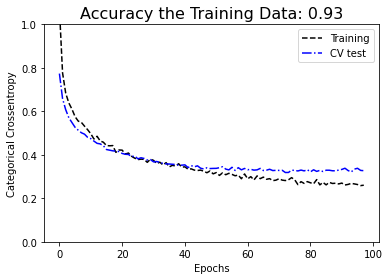

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1912224441766739 training accuracy:  0.9547407627105713
Evaluation of validation Data: 
 cv loss:  0.3247090280056 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1947559267282486 training accuracy:  0.9490117430686951
Evaluation of validation Data: 
 cv loss:  0.29493603110313416 cv accuracy:  0.9083619713783264
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.20779898762702942 training accuracy:  0.9432827234268188
Evaluation of validation Data: 
 cv loss:  0.2953662872314453 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19355086982250214 training accuracy:  0.9481523633003235
Evaluation of validation Data: 
 cv loss:  0.337259978055954 cv acc

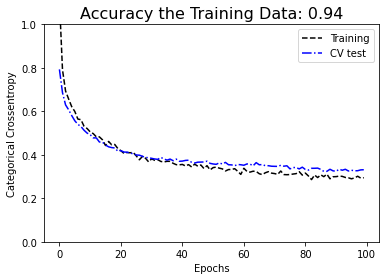

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.6927533745765686 training accuracy:  0.8292752504348755
Evaluation of validation Data: 
 cv loss:  0.7354292869567871 cv accuracy:  0.7995418310165405
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.6957845091819763 training accuracy:  0.8241191506385803
Evaluation of validation Data: 
 cv loss:  0.7191805243492126 cv accuracy:  0.8281787037849426
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.6963162422180176 training accuracy:  0.8307075500488281
Evaluation of validation Data: 
 cv loss:  0.720258355140686 cv accuracy:  0.8167239427566528
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.6963459849357605 training accuracy:  0.8264107704162598
Evaluation of validation Data: 
 cv loss:  0.7015473246574402 cv acc

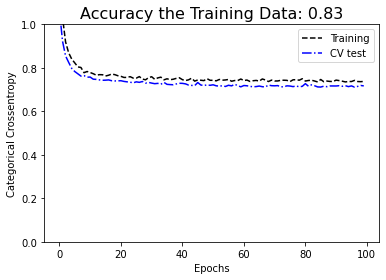

time: 10min 10s (started: 2022-02-24 22:30:19 +01:00)


In [69]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2

hyperparameter['weight regularisation l2'] = 0.00001
model_training(hyperparameter, 'l2_0_00001')

hyperparameter['weight regularisation l2'] = 0.0001
model_training(hyperparameter, 'l2_0_0001')

hyperparameter['weight regularisation l2'] = 0.01
model_training(hyperparameter, 'l2_0_01')

## Activation Functions

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19031138718128204 training accuracy:  0.9355485439300537
Evaluation of validation Data: 
 cv loss:  0.2728853225708008 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.20867180824279785 training accuracy:  0.9255227446556091
Evaluation of validation Data: 
 cv loss:  0.2772361934185028 cv accuracy:  0.8991981744766235
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2010553926229477 training accuracy:  0.9286737442016602
Evaluation of validation Data: 
 cv loss:  0.26799631118774414 cv accuracy:  0.907216489315033
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.19646507501602173 training accuracy:  0.9329705238342285
Evaluation of validation Data: 
 cv loss:  0.2676253914833069 cv

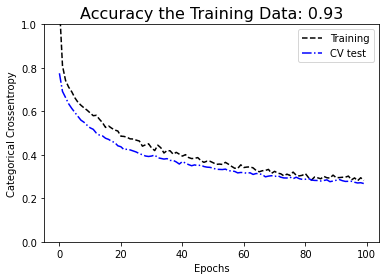

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.28677400946617126 training accuracy:  0.9074763655662537
Evaluation of validation Data: 
 cv loss:  0.34216445684432983 cv accuracy:  0.8808705806732178
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.28327348828315735 training accuracy:  0.9066169857978821
Evaluation of validation Data: 
 cv loss:  0.36215388774871826 cv accuracy:  0.8751431703567505
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2750893235206604 training accuracy:  0.9097679853439331
Evaluation of validation Data: 
 cv loss:  0.32960495352745056 cv accuracy:  0.8774341344833374
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2767364978790283 training accuracy:  0.9043254256248474
Evaluation of validation Data: 
 cv loss:  0.3418888747692108 

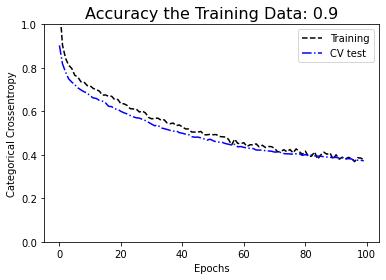

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.22017446160316467 training accuracy:  0.9249498844146729
Evaluation of validation Data: 
 cv loss:  0.3097822964191437 cv accuracy:  0.8980526924133301
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.23974889516830444 training accuracy:  0.9177886247634888
Evaluation of validation Data: 
 cv loss:  0.2835903763771057 cv accuracy:  0.8923253417015076
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2341291308403015 training accuracy:  0.9186479449272156
Evaluation of validation Data: 
 cv loss:  0.28991594910621643 cv accuracy:  0.904925525188446
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.2246336042881012 training accuracy:  0.920366644859314
Evaluation of validation Data: 
 cv loss:  0.2875584363937378 cv a

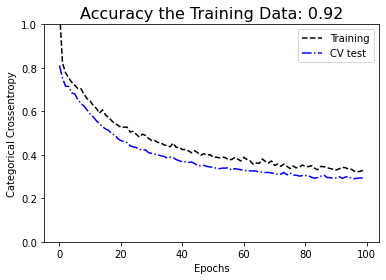

time: 10min 10s (started: 2022-02-24 22:40:30 +01:00)


In [70]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['weight regularisation l2'] = '-'

hyperparameter['activation_hidden'] = 'elu'
model_training(hyperparameter, 'elu')

hyperparameter['activation_hidden'] = 'sigmoid'
model_training(hyperparameter, 'sigmoid')

hyperparameter['activation_hidden'] = 'selu'
hyperparameter['initialization'] = 'lecun_normal'
model_training(hyperparameter, 'selu_with_LeCun')

## Initialization 

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15786851942539215 training accuracy:  0.9521626830101013
Evaluation of validation Data: 
 cv loss:  0.3027319610118866 cv accuracy:  0.9186712503433228
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16961821913719177 training accuracy:  0.9452878832817078
Evaluation of validation Data: 
 cv loss:  0.2925671637058258 cv accuracy:  0.9106529355049133
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.157382532954216 training accuracy:  0.9504439830780029
Evaluation of validation Data: 
 cv loss:  0.2544082701206207 cv accuracy:  0.9060710072517395
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15945205092430115 training accuracy:  0.951589822769165
Evaluation of validation Data: 
 cv loss:  0.30131232738494873 cv 

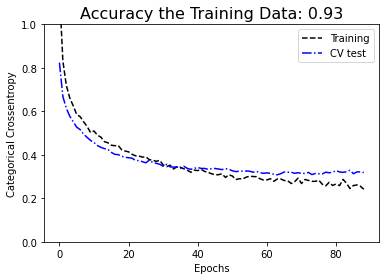

time: 3min 22s (started: 2022-02-24 22:50:41 +01:00)


In [71]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['weight regularisation l2'] = '-'
hyperparameter['activation_hidden'] = 'relu'

hyperparameter['initialization'] = 'he_normal'
model_training(hyperparameter, 'he_normal')

## Batch Size 

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1900324821472168 training accuracy:  0.9401317834854126
Evaluation of validation Data: 
 cv loss:  0.2967039942741394 cv accuracy:  0.9129438996315002
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17408718168735504 training accuracy:  0.9455743432044983
Evaluation of validation Data: 
 cv loss:  0.32079607248306274 cv accuracy:  0.9140893220901489
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16557426750659943 training accuracy:  0.9504439830780029
Evaluation of validation Data: 
 cv loss:  0.2885279059410095 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.14867594838142395 training accuracy:  0.9492982029914856
Evaluation of validation Data: 
 cv loss:  0.34877896308898926 

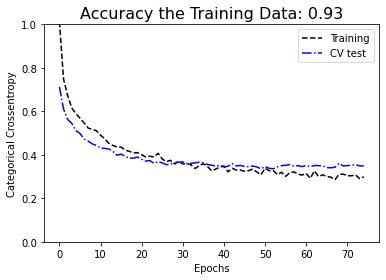

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1528758853673935 training accuracy:  0.948438823223114
Evaluation of validation Data: 
 cv loss:  0.24864517152309418 cv accuracy:  0.9163802862167358
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16874463856220245 training accuracy:  0.9452878832817078
Evaluation of validation Data: 
 cv loss:  0.26913201808929443 cv accuracy:  0.9163802862167358
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15774443745613098 training accuracy:  0.951016902923584
Evaluation of validation Data: 
 cv loss:  0.2484351247549057 cv accuracy:  0.9198167324066162
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15379120409488678 training accuracy:  0.9518762826919556
Evaluation of validation Data: 
 cv loss:  0.28738194704055786 c

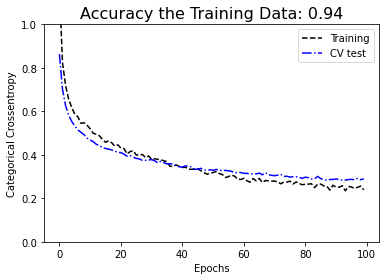

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.17583158612251282 training accuracy:  0.9455743432044983
Evaluation of validation Data: 
 cv loss:  0.2976958155632019 cv accuracy:  0.9129438996315002
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.16130773723125458 training accuracy:  0.9501575231552124
Evaluation of validation Data: 
 cv loss:  0.27060559391975403 cv accuracy:  0.9140893220901489
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.15887068212032318 training accuracy:  0.9495846629142761
Evaluation of validation Data: 
 cv loss:  0.23675882816314697 cv accuracy:  0.9152348041534424
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1704055368900299 training accuracy:  0.9444285035133362
Evaluation of validation Data: 
 cv loss:  0.3070952892303467 

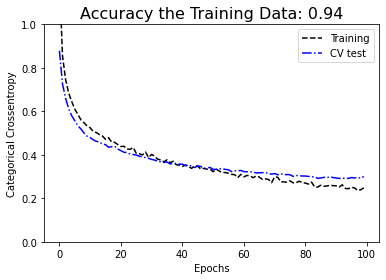

time: 10min 13s (started: 2022-02-24 22:54:03 +01:00)


In [72]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['weight regularisation l2'] = '-'
hyperparameter['activation_hidden'] = 'relu'
hyperparameter['initialization'] = 'glorot_uniform'

#hyperparameter['batch_size'] = 2
#model_training(hyperparameter, 'batch_size_2')

hyperparameter['batch_size'] = 5
model_training(hyperparameter, 'batch_size_5')

hyperparameter['batch_size'] = 15
model_training(hyperparameter, 'batch_size_15')

hyperparameter['batch_size'] = 20
model_training(hyperparameter, 'batch_size_20')

## Optimizer - Adam 

Although we had tried & concluded that weight regularization plays no significant role above with Adam optimizer it does improve the result a bit so I am adding it here

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12873677909374237 training accuracy:  0.9621884822845459
Evaluation of validation Data: 
 cv loss:  0.23765115439891815 cv accuracy:  0.9255440831184387
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.11849552392959595 training accuracy:  0.9687768816947937
Evaluation of validation Data: 
 cv loss:  0.2022358775138855 cv accuracy:  0.9392898082733154
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1199437752366066 training accuracy:  0.9647665619850159
Evaluation of validation Data: 
 cv loss:  0.19379937648773193 cv accuracy:  0.9392898082733154
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.12259693443775177 training accuracy:  0.9596104025840759
Evaluation of validation Data: 
 cv loss:  0.24883954226970673

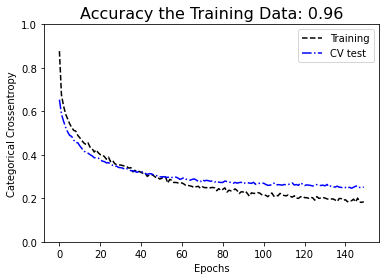

time: 2min 33s (started: 2022-02-24 23:06:42 +01:00)


In [74]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['activation_hidden'] = 'relu'
hyperparameter['initialization'] = 'glorot_uniform'
hyperparameter['weight regularisation l2'] = 1e-5
hyperparameter['batch_size'] = 20
hyperparameter['num_epochs'] = 150

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
hyperparameter['optimizer'] = optimizer

model_training(hyperparameter, 'Adam')

Lets try learning rate decay

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.136705219745636 training accuracy:  0.957605242729187
Evaluation of validation Data: 
 cv loss:  0.24466758966445923 cv accuracy:  0.9198167324066162
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.13260877132415771 training accuracy:  0.960183322429657
Evaluation of validation Data: 
 cv loss:  0.21948643028736115 cv accuracy:  0.9289805293083191
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.13859577476978302 training accuracy:  0.9581781625747681
Evaluation of validation Data: 
 cv loss:  0.19752530753612518 cv accuracy:  0.931271493434906
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.1476862132549286 training accuracy:  0.9570323824882507
Evaluation of validation Data: 
 cv loss:  0.22964909672737122 cv 

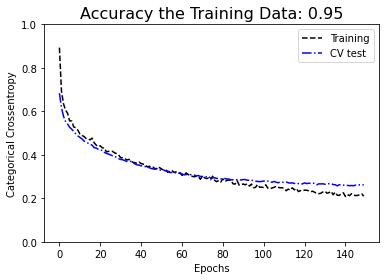

time: 2min 53s (started: 2022-02-24 23:09:15 +01:00)


In [75]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=272,
    decay_rate=0.999)


hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['activation_hidden'] = 'relu'
hyperparameter['initialization'] = 'glorot_uniform'
hyperparameter['weight regularisation l2'] = 1e-5
hyperparameter['batch_size'] = 20
hyperparameter['num_epochs'] = 150

optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
hyperparameter['optimizer'] = optimizer

model_training(hyperparameter, 'Adam_exp_decay')

## Epoch - 500

--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.10445055365562439 training accuracy:  0.9704955816268921
Evaluation of validation Data: 
 cv loss:  0.21777354180812836 cv accuracy:  0.9404352903366089
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.09723348915576935 training accuracy:  0.9742194414138794
Evaluation of validation Data: 
 cv loss:  0.19646671414375305 cv accuracy:  0.9461626410484314
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.10029973089694977 training accuracy:  0.9742194414138794
Evaluation of validation Data: 
 cv loss:  0.170767143368721 cv accuracy:  0.9415807723999023
--------------------------------------------------------
Evaluation of training Data: 
 training loss:  0.0869370624423027 training accuracy:  0.9765110015869141
Evaluation of validation Data: 
 cv loss:  0.21494923532009125 

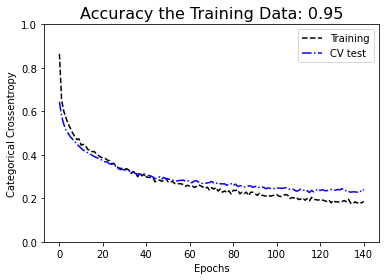

time: 3min 49s (started: 2022-02-24 23:18:58 +01:00)


In [86]:
hyperparameter['hidden_layer'] = 1
hyperparameter['units_hidden_layer'] = 32
hyperparameter['dropout'] = 0.2
hyperparameter['activation_hidden'] = 'relu'
hyperparameter['initialization'] = 'glorot_uniform'
hyperparameter['weight regularisation l2'] = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
hyperparameter['optimizer'] = optimizer

hyperparameter['batch_size'] = 20
hyperparameter['num_epochs'] = 500
model_training(hyperparameter, 'batch_size_20_epochs_500')

# 6. Evaluation of the model predictions

                   precision    recall  f1-score   support

Slight-Right-Turn       0.92      0.88      0.90       420
 Sharp-Right-Turn       0.92      0.94      0.93       434
     Move-Forward       0.85      0.91      0.88       173
 Slight-Left-Turn       0.95      0.88      0.91        65

         accuracy                           0.91      1092
        macro avg       0.91      0.90      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



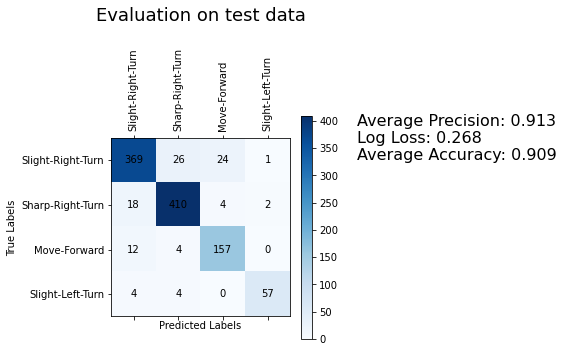

time: 562 ms (started: 2022-02-24 23:17:11 +01:00)


In [77]:
loaded_model = keras.models.load_model('Base_model.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.89      0.88      0.88       420
 Sharp-Right-Turn       0.91      0.94      0.93       434
     Move-Forward       0.86      0.86      0.86       173
 Slight-Left-Turn       0.98      0.78      0.87        65

         accuracy                           0.90      1092
        macro avg       0.91      0.87      0.89      1092
     weighted avg       0.90      0.90      0.90      1092



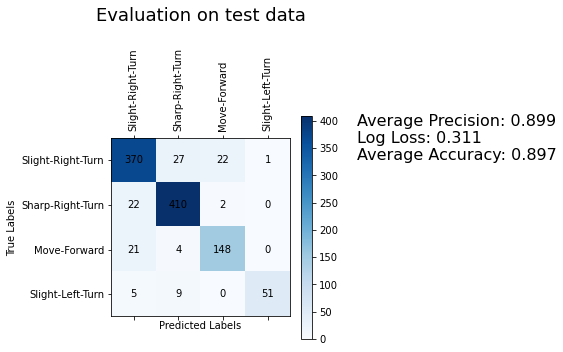

time: 562 ms (started: 2022-02-24 23:17:17 +01:00)


In [78]:
loaded_model = keras.models.load_model('16Neurons.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.89      0.91      0.90       420
 Sharp-Right-Turn       0.93      0.94      0.93       434
     Move-Forward       0.88      0.87      0.88       173
 Slight-Left-Turn       0.95      0.82      0.88        65

         accuracy                           0.91      1092
        macro avg       0.91      0.88      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



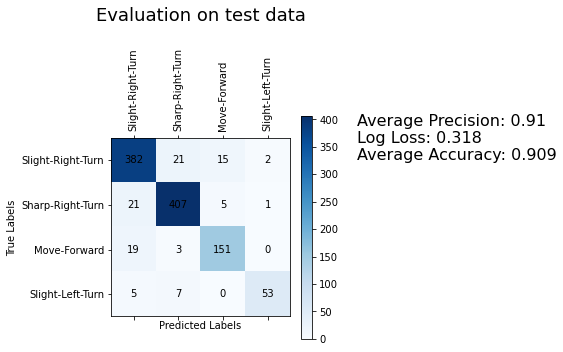

time: 516 ms (started: 2022-02-24 23:17:25 +01:00)


In [79]:
loaded_model = keras.models.load_model('48Neurons.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.88      0.90      0.89       420
 Sharp-Right-Turn       0.92      0.94      0.93       434
     Move-Forward       0.88      0.84      0.86       173
 Slight-Left-Turn       0.94      0.78      0.86        65

         accuracy                           0.90      1092
        macro avg       0.91      0.87      0.89      1092
     weighted avg       0.90      0.90      0.90      1092



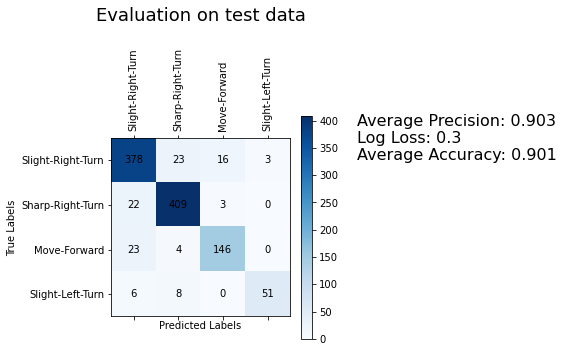

time: 531 ms (started: 2022-02-24 23:17:34 +01:00)


In [80]:
loaded_model = keras.models.load_model('1hidden_16.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.89      0.90      0.90       420
 Sharp-Right-Turn       0.93      0.93      0.93       434
     Move-Forward       0.89      0.89      0.89       173
 Slight-Left-Turn       0.95      0.85      0.89        65

         accuracy                           0.91      1092
        macro avg       0.91      0.89      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



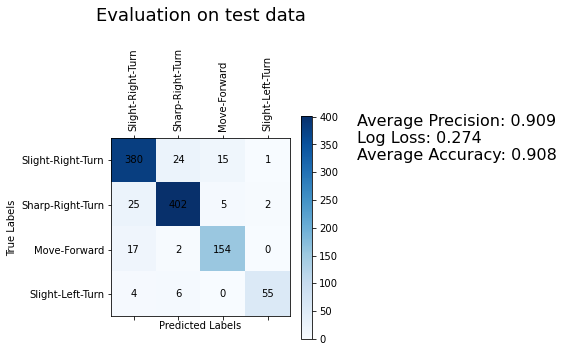

time: 532 ms (started: 2022-02-24 23:17:39 +01:00)


In [81]:
loaded_model = keras.models.load_model('1hidden_32.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.88      0.92      0.90       420
 Sharp-Right-Turn       0.94      0.95      0.94       434
     Move-Forward       0.91      0.83      0.87       173
 Slight-Left-Turn       1.00      0.80      0.89        65

         accuracy                           0.91      1092
        macro avg       0.93      0.88      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



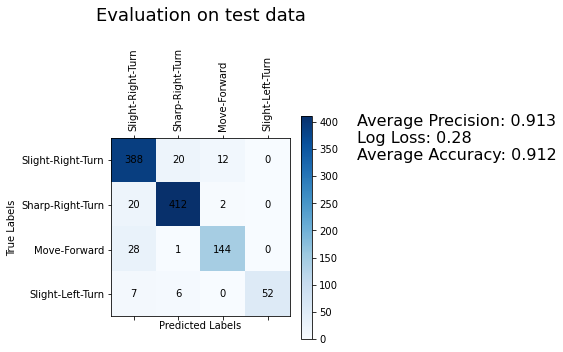

time: 781 ms (started: 2022-02-24 23:17:49 +01:00)


In [82]:
loaded_model = keras.models.load_model('dropout0_2.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.90      0.90      0.90       420
 Sharp-Right-Turn       0.93      0.94      0.94       434
     Move-Forward       0.89      0.87      0.88       173
 Slight-Left-Turn       0.90      0.83      0.86        65

         accuracy                           0.91      1092
        macro avg       0.90      0.89      0.90      1092
     weighted avg       0.91      0.91      0.91      1092



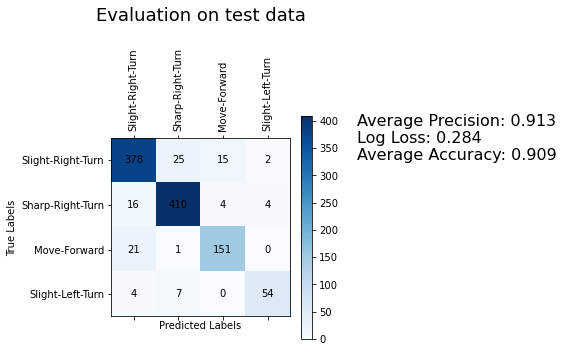

time: 578 ms (started: 2022-02-24 23:18:05 +01:00)


In [83]:
loaded_model = keras.models.load_model('l2_0_00001.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.91      0.91      0.91       420
 Sharp-Right-Turn       0.92      0.96      0.94       434
     Move-Forward       0.92      0.88      0.90       173
 Slight-Left-Turn       1.00      0.82      0.90        65

         accuracy                           0.92      1092
        macro avg       0.94      0.89      0.91      1092
     weighted avg       0.92      0.92      0.92      1092



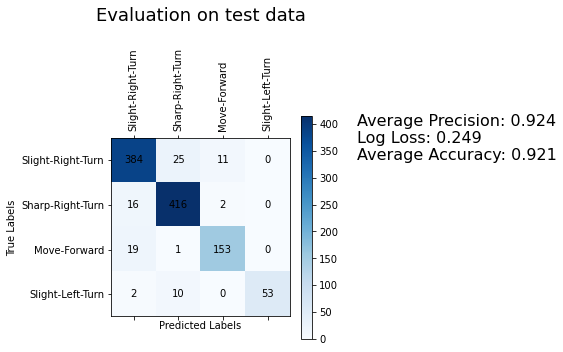

time: 531 ms (started: 2022-02-24 23:18:33 +01:00)


In [84]:
loaded_model = keras.models.load_model('batch_size_20.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.90      0.94      0.92       420
 Sharp-Right-Turn       0.95      0.96      0.95       434
     Move-Forward       0.95      0.87      0.91       173
 Slight-Left-Turn       0.98      0.86      0.92        65

         accuracy                           0.93      1092
        macro avg       0.94      0.91      0.92      1092
     weighted avg       0.93      0.93      0.93      1092



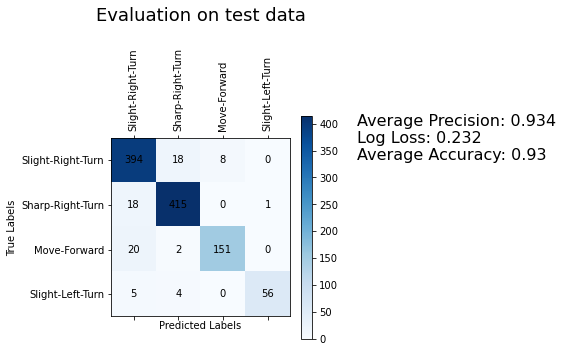

time: 547 ms (started: 2022-02-24 23:18:40 +01:00)


In [85]:
loaded_model = keras.models.load_model('Adam.h5')
evaluate_model_test_data(loaded_model)

                   precision    recall  f1-score   support

Slight-Right-Turn       0.91      0.94      0.92       420
 Sharp-Right-Turn       0.96      0.96      0.96       434
     Move-Forward       0.92      0.90      0.91       173
 Slight-Left-Turn       0.97      0.88      0.92        65

         accuracy                           0.93      1092
        macro avg       0.94      0.92      0.93      1092
     weighted avg       0.93      0.93      0.93      1092



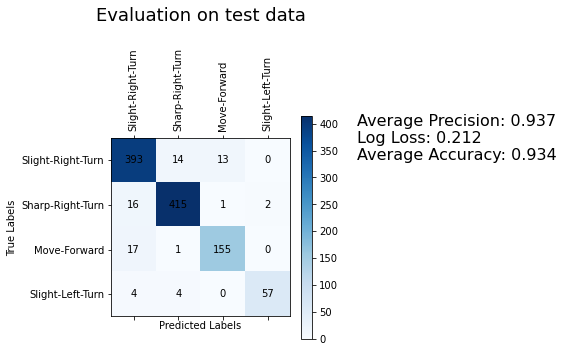

time: 562 ms (started: 2022-02-24 23:23:09 +01:00)


In [87]:
loaded_model = keras.models.load_model('batch_size_20_epochs_500.h5')
evaluate_model_test_data(loaded_model)

## Results & Comparisions:
From Base Model to the last one I was able to improve scores from: 
1. Training Loss - 0.13 to 0.099 
2. Validation Loss - 0.27 to  0.21 
3. Training Accuracy - 0.96 to 0.97
4. Validation Accuracy - 0.91 to 0.94 

which represents 22% improvement in validation loss 

Random Forest Loss : 0.06  


# 7. Lessons learnt and Conclusions 

## Conclusions:
1. In the model Testing phase 1 Random Forest model gives the best results. 
2. Although PCA reduces the number of components it fails to further improve the results, rather worsens it.  
3. Gradient Decent and Logistic Regression model fails to give good results. 
4. In Model Testing Phase 2 neural Network has large number of parameters and tuning options.  
5. I was able to tune the model with various parameters such as dropout, optimizer, initializer, hidden layers, no. of neurons, batch size etc. 
6. Out of these parameters batch size, optmizer, no. neurons and dropout has significant impact on the output.
8. In this case all evaluation Parameters of Random Forest far outweighs that of neural networks so it is not always the case that neural networks will provide best solution. 

## Lessions Learnt:
1. PCA does not always work 
2. Simple models can give better results than complex neural networks. 
3. In neural network some tuning parameters have more impact than some. 
4. Always start with high number of epochs so that solution actually reaches to minimum. Although it takes lot of time early stop callback would solve the problem  